In [ ]:
# scraping data
key = 'house'
url = 'https://www.lamudi.co.id/yogyakarta/{}/buy/?page='.format(key) # url web yang akan discrape
headers = {
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}
req = requests.get(url, headers=headers)
print(req)

<Response [200]>


In [ ]:
# Inspect element
dataset = []
count_page = 0
for page in range(1,11):
    count_page+=1
    print('scraping page :',count_page)
    req = requests.get(url+str(page), headers=headers)
    soup = BeautifulSoup(req.text, 'html.parser')
    items = soup.findAll('div', 'row ListingCell-row ListingCell-agent-redesign')
    for item in items:
        try :
            address = item.find('div', 'ListingCell-KeyInfo-address ellipsis').text.strip()
        except :
            address = ''
        try :
            price = item.find('span', 'PriceSection-FirstPrice').text.strip()
        except :
            price = ''
        try :
            detail = ''.join(item.find('div', 'ListingCell-keyInfo-details').text.strip().split('\n'))
        except :
            detail = ''
        dataset.append([address, price, detail])
        
    
head = ['Address', 'Price', 'Details']
writer = csv.writer(open('test_residents.csv', 'w', newline=''))
writer.writerow(head)
for d in dataset:
    writer.writerow(d)      

scraping page : 1
scraping page : 2
scraping page : 3
scraping page : 4
scraping page : 5
scraping page : 6
scraping page : 7
scraping page : 8
scraping page : 9
scraping page : 10


In [ ]:
# Membaca data
df = pd.read_csv("test_residents.csv", encoding = "ISO-8859-1")
df.head()

,Address,Price,Details
0,Sleman,Rp 1.850.000.000,4 Kamar tidur ...
1,"Seyegan, Sleman",Rp 480.000.000,2 Kamar tidur ...
2,"Seyegan, Sleman",Rp 425.000.000,2 Kamar tidur ...
3,"Prambanan, Sleman",Rp 395.000.000,2 Kamar tidur ...
4,"Godean, Sleman",Rp 1.285.000.000,3 Kamar tidur ...


In [ ]:
# Split alamat 
df[['Kec', 'Kab']] = df['Address'].str.split(r",", expand=True)
df = df.drop(['Address'], axis = 1)
df.head()

,Price,Details,Kec,Kab
0,Rp 1.850.000.000,4 Kamar tidur ...,Sleman,None
1,Rp 480.000.000,2 Kamar tidur ...,Seyegan,Sleman
2,Rp 425.000.000,2 Kamar tidur ...,Seyegan,Sleman
3,Rp 395.000.000,2 Kamar tidur ...,Prambanan,Sleman
4,Rp 1.285.000.000,3 Kamar tidur ...,Godean,Sleman


In [ ]:
def cleaning(text):
    text = re.sub(r"[.,?]", " ", text) # Remove titik
    text = re.sub(r"[Rp, m², Lahan, Â]", " ", text) # Remove 'Rp'
    text = re.sub(r"\s+", "", text) # Remove whitespace
    return text

In [ ]:
# Membuang karakter dari kolom Price dan details
df['Price'] = df['Price'].apply(cleaning)
df['Details'] = df['Details'].apply(cleaning)
df.head()

,Price,Details,Kec,Kab
0,1850000000,4Krtidur125Bgu164,Sleman,None
1,480000000,2Krtidur50Bgu107,Seyegan,Sleman
2,425000000,2Krtidur60Bgu90,Seyegan,Sleman
3,395000000,2Krtidur36Bgu72,Prambanan,Sleman
4,1285000000,3Krtidur75Bgu110,Godean,Sleman


In [ ]:
# Split details
df[['KT', 'Bangunan', 'Lahan']] = df['Details'].str.split(r"Krtidur|Bgu", expand=True)
df = df.drop(['Details'], axis = 1)
df.head()

,Price,Kec,Kab,KT,Bangunan,Lahan
0,1850000000,Sleman,None,4,125,164
1,480000000,Seyegan,Sleman,2,50,107
2,425000000,Seyegan,Sleman,2,60,90
3,395000000,Prambanan,Sleman,2,36,72
4,1285000000,Godean,Sleman,3,75,110


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     266 non-null    object
 1   Kec       266 non-null    object
 2   Kab       254 non-null    object
 3   KT        266 non-null    object
 4   Bangunan  266 non-null    object
 5   Lahan     265 non-null    object
dtypes: object(6)
memory usage: 12.6+ KB


In [ ]:
# Cek ukuran data
df.shape

(266, 6)

In [ ]:
# cek duplikat data
print('Number of duplicates in dataset:', df.duplicated().sum())

Number of duplicates in dataset: 4


In [ ]:
# Drop data duplikat 
df = df.drop(df[df.duplicated()].index)

In [ ]:
# Sanity check ukuran data
df.shape

(262, 6)

In [ ]:
# check terhadap null value
null_info = df.isnull().sum().sort_values(ascending=False).reset_index().head(20)
null_info.columns = ["Variable", "NullValue"]
null_info[null_info.NullValue>0]

,Variable,NullValue
0,Kab,12
1,Lahan,1


In [ ]:
# Drop variabel NaN 
data = df.dropna(axis=1)

In [ ]:
# Sanity check terhadap null value
null_info = data.isnull().sum().sort_values(ascending=False).reset_index().head(20)
null_info.columns = ["Variable", "NullValue"]
null_info[null_info.NullValue>0]

,Variable,NullValue


In [ ]:
# Check tipe data
print(data.dtypes)

Price       object
Kec         object
KT          object
Bangunan    object
dtype: object


In [ ]:
# Melihat data
data.head()

,Price,Kec,KT,Bangunan
0,1850000000,Sleman,4,125
1,480000000,Seyegan,2,50
2,425000000,Seyegan,2,60
3,395000000,Prambanan,2,36
4,1285000000,Godean,3,75


In [ ]:
# mengubah bentuk data KT, Bangunan, dan Price menjadi numerik
data['Price'] = data['Price'].astype('int64')
data['KT'] = data['KT'].astype('int64')
data['Bangunan'] = data['Bangunan'].astype('int64')

In [ ]:
# Sanity check terhadap tipe data
print(data.dtypes)

Price        int64
Kec         object
KT           int64
Bangunan     int64
dtype: object


In [ ]:
# Label encoding Kabupaten
le = LabelEncoder()
data['Kec'] = le.fit_transform(data['Kec'])
data

<ipython-input-28-cc4e666c2e6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kec'] = le.fit_transform(data['Kec'])


,Price,Kec,KT,Bangunan
0,1850000000,31,4,125
1,480000000,30,2,50
2,425000000,30,2,60
3,395000000,26,2,36
4,1285000000,6,3,75
...,...,...,...,...
261,345000000,1,2,37
262,280000000,28,2,36
263,205000000,10,2,32
264,300000000,31,2,110


In [ ]:
# Cek missing values
data.isna().any()

Price       False
Kec         False
KT          False
Bangunan    False
dtype: bool

In [ ]:
#Split Data Input-Ouput
def splitInputOutput(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [ ]:
target_column = "Price"
X, y = splitInputOutput(data = data,
                        target_column = target_column)

In [ ]:
X.head()

,Kec,KT,Bangunan
0,31,4,125
1,30,2,50
2,30,2,60
3,26,2,36
4,6,3,75


In [ ]:
y.head()

0    1850000000
1     480000000
2     425000000
3     395000000
4    1285000000
Name: Price, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 3), (79, 3), (183,), (79,))

In [ ]:
X_train.head()

,Kec,KT,Bangunan
35,13,2,78
259,9,3,80
138,31,2,40
142,18,6,380
230,4,2,40


In [ ]:
# Buat & Fit scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Transform data
X_train_clean = scaler.transform(X_train)
X_train_clean = pd.DataFrame(X_train_clean,
                             columns = X_train.columns,
                             index = X_train.index)

X_train_clean.head()

,Kec,KT,Bangunan
35,-0.371578,-0.497690,-0.290430
259,-0.757387,-0.154002,-0.274612
138,1.364561,-0.497690,-0.590972
142,0.110683,0.877061,2.098094
230,-1.239648,-0.497690,-0.590972


In [ ]:
X_test.head()

,Kec,KT,Bangunan
30,31,2,60
72,18,3,80
247,20,2,39
126,11,2,45
205,23,2,76


In [ ]:
scaler.fit(X_test)

StandardScaler()

In [ ]:
# Transform data
X_test_clean = scaler.transform(X_test)
X_test_clean = pd.DataFrame(X_test_clean,
                             columns = X_test.columns,
                             index = X_test.index)

X_test_clean.head()

,Kec,KT,Bangunan
30,1.203029,-0.696419,-0.455595
72,-0.069382,-0.078249,-0.255194
247,0.126374,-0.696419,-0.666016
126,-0.754526,-0.696419,-0.605896
205,0.420007,-0.696419,-0.295274


In [ ]:
y_pred_baseline = y_train.mean()
y_pred_baseline

1229173481.147541

In [ ]:
y_test.head()

30     698000000
72     650000000
247    210000000
126    350000000
205    154900000
Name: Price, dtype: int64

In [ ]:
mae_train_baseline = mean_absolute_error(y_train, y_pred_baseline * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_pred_baseline * np.ones(len(y_test)))

mae_train_baseline, mae_test_baseline

(919419955.6570815, 923092745.7794145)

Decision Tree

In [ ]:
params = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Buat gridsearch
tree = DecisionTreeRegressor(random_state = 123)

tree_cv = GridSearchCV(estimator = tree,
                       param_grid = params,
                       cv = 5,
                       scoring = "neg_mean_absolute_error")

In [ ]:
# Fit grid search cv
tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Best params
tree_cv.best_params_

{'max_depth': 3}

In [ ]:
# Refit the bagging tree
tree = DecisionTreeRegressor(max_depth = tree_cv.best_params_["max_depth"],
                             random_state = 123)

tree.fit(X_train_clean, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

In [ ]:
# Predict
y_pred_train = tree.predict(X_train_clean)

# MSE
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
mae_cv_dt = -tree_cv.best_score_

print(f"MAE Train :{mae_train_dt:.4f}")
print(f"MAE CV    :{mae_cv_dt:.4f}")

MAE Train :314192878.1909
MAE CV    :460612724.3912


Bagging

In [ ]:
B = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor()
bagging_tree = BaggingRegressor(base_estimator = tree,
                                random_state = 123)

bagging_cv = GridSearchCV(estimator = bagging_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [ ]:
# Fit grid search cv
bagging_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500, 550, 600]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Best params
bagging_cv.best_params_

{'n_estimators': 250}

In [ ]:
# Refit the bagging tree
bagging_tree = BaggingRegressor(base_estimator = tree,
                                n_estimators = bagging_cv.best_params_["n_estimators"],
                                random_state = 123)

bagging_tree.fit(X_train_clean, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=250,
                 random_state=123)

In [ ]:
# Predict
y_pred_train = bagging_tree.predict(X_train_clean)

# MSE
mae_train_bg = mean_absolute_error(y_train, y_pred_train)
mae_cv_bg = -bagging_cv.best_score_

print(f"MAE Train :{mae_train_bg:.4f}")
print(f"MAE CV    :{mae_cv_bg:.4f}")

MAE Train :161924558.5196
MAE CV    :405550979.2001


Random Forest

In [ ]:
params = {"n_estimators": B,
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [ ]:
# Fit grid search cv
rf_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500, 550, 600]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=150, random_state=123)

In [ ]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)

# MSE
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_cv_rf = -rf_tree_cv.best_score_

print(f"MAE Train :{mae_train_rf:.4f}")
print(f"MAE CV    :{mae_cv_rf:.4f}")

MAE Train :152429649.4394
MAE CV    :419854872.4152


AdaBoost

In [ ]:
# Build random forest
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = 50,
                             random_state = 123)

In [ ]:
# Fit random forest
ada_tree.fit(X_train_clean, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=123)

In [ ]:
# Predict
y_pred_train = ada_tree.predict(X_train_clean)
y_pred_test = ada_tree.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(357995109.35896534, 604284301.6066782)

In [ ]:
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             random_state = 123)

ada_tree_cv = GridSearchCV(estimator = ada_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [ ]:
# Fit grid search cv
ada_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500, 550, 600]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Best params
ada_tree_cv.best_params_

{'n_estimators': 10}

In [ ]:
# Refit the Adaboost
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = ada_tree_cv.best_params_["n_estimators"],
                             random_state = 123)

ada_tree.fit(X_train_clean, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=10, random_state=123)

In [ ]:
# Predict
y_pred_train = ada_tree.predict(X_train_clean)

# MSE
mae_train_ab = mean_absolute_error(y_train, y_pred_train)
mae_cv_ab = -ada_tree_cv.best_score_

print(f"MAE Train :{mae_train_ab:.4f}")
print(f"MAE CV    :{mae_cv_ab:.4f}")

MAE Train :330441575.2499
MAE CV    :471077956.2865


In [ ]:
# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 123)

In [ ]:
# Fit random forest
grad_tree.fit(X_train_clean, y_train)

GradientBoostingRegressor(random_state=123)

In [ ]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)
y_pred_test = grad_tree.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(146932317.87080443, 495013916.9401357)

In [ ]:
params = {"n_estimators": B}

# Buat gridsearch
grad_tree = GradientBoostingRegressor(random_state = 123)

grad_tree_cv = GridSearchCV(estimator = grad_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [ ]:
# Fit grid search cv
grad_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500, 550, 600]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Best params
grad_tree_cv.best_params_

{'n_estimators': 50}

In [ ]:
# Refit the Adaboost
grad_tree = GradientBoostingRegressor(n_estimators = grad_tree_cv.best_params_["n_estimators"],
                                      random_state = 123)

grad_tree.fit(X_train_clean, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=123)

In [ ]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)

# MSE
mae_train_gb = mean_absolute_error(y_train, y_pred_train)
mae_cv_gb = -grad_tree_cv.best_score_

print(f"MSE Train :{mae_train_gb:.4f}")
print(f"MSE CV    :{mae_cv_gb:.4f}")

MSE Train :192463754.3737
MSE CV    :419008790.0572


In [ ]:
mae_train = [mae_train_dt, mae_train_bg, mae_train_rf, mae_train_ab, mae_train_gb]
mae_cv = [mae_cv_dt, mae_cv_bg, mae_cv_rf, mae_cv_ab, mae_cv_gb]
indexes = ["decision tree", "bagging", "random forest", "adaBoost", "gradientBoost"]

summary_df = pd.DataFrame({"MAE Train": mae_train,
                           "MAE CV": mae_cv},
                          index = indexes)
summary_df

,MAE Train,MAE CV
decision tree,3.141929e+08,4.606127e+08
bagging,1.619246e+08,4.055510e+08
random forest,1.524296e+08,4.198549e+08
adaBoost,3.304416e+08,4.710780e+08
gradientBoost,1.924638e+08,4.190088e+08


In [ ]:
# Predict MSE
y_pred_test = rf_tree.predict(X_test_clean)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test, mae_test_baseline

(412291047.39863265, 923092745.7794145)

In [ ]:
# Predict MSE
y_pred_test = bagging_tree.predict(X_test_clean)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test, mae_test_baseline

(435094289.7593237, 923092745.7794145)

(0.0, 5000000000.0)

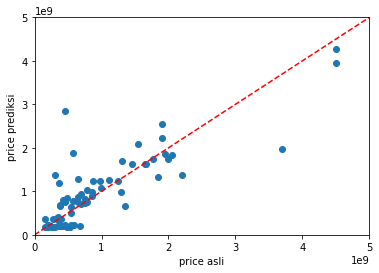

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.plot([0, 5000000000], [0,5000000000], "--r")

plt.xlabel("price asli")
plt.ylabel("price prediksi")
plt.xlim(0, 5000000000)
plt.ylim(0, 5000000000)

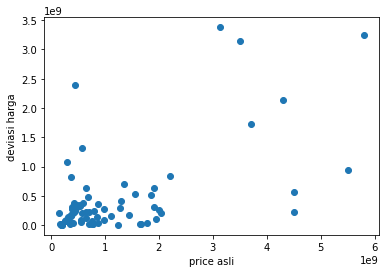

In [ ]:
price_deviation = np.abs(y_test - y_pred_test)

plt.scatter(y_test, price_deviation)
plt.xlabel("price asli")
plt.ylabel("deviasi harga")

plt.show()